In [125]:
import random,math,timeit,numpy,statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

In [126]:
# create deck
null     = 1
minustwo = 0
minusone = 5
zero     = 6
plusone  = 5
plustwo  = 1
plusthree = 0
crit     = 1

cards = [null,minustwo,minusone,zero,plusone,plustwo,plusthree,crit]

deck = []
n = 0
for x in cards:
    i = 0
    if n == 0:
        while x > i:
            deck.append('NULL')
            i = i + 1
        n = n + 1
    elif n == 7:
        while x > i:
            deck.append('CRIT')
            i = i + 1
    else:
        while x > i:
            deck.append(n-3)
            i = i + 1
        n = n + 1

In [132]:
# set number of cycles
t = 10000
basedmg = 3


k = 0
data = []
while k < t:
    testdeck = list(deck)
    random.shuffle(testdeck)
    while len(testdeck) > 0 and k < t:
        i = testdeck.pop(0) 
        if i == 'NULL':
            testdeck = []
            data.append(0)
        elif i == 'CRIT':
            testdeck = []
            data.append(2*basedmg)
        else: 
            data.append(basedmg + i)
        k = k + 1

data = pd.Series(data)
freq = data.value_counts()
freq = freq.sort_index()
for x in freq.index:
    freq[x] = freq[x]/t

lfreq = []
for x in range(freq.last_valid_index() + 1):
    if freq.index[x] != x:
        lfreq = lfreq.append('see')
    else:
        lfreq = lfreq.append(freq[x])     

AttributeError: 'NoneType' object has no attribute 'append'

In [ ]:
type(lfreq)

NoneType

3.1091999999999995

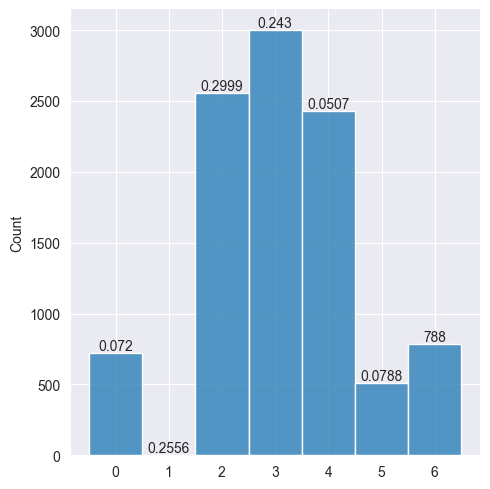

In [ ]:
ax = sns.displot(data=data,discrete=True)
ax.axes.ravel()[0].bar_label(ax.axes.ravel()[0].containers[0],labels=list(freq));
avg = 0
for x in freq.index:
    avg = avg + freq[x]*x
display(avg)